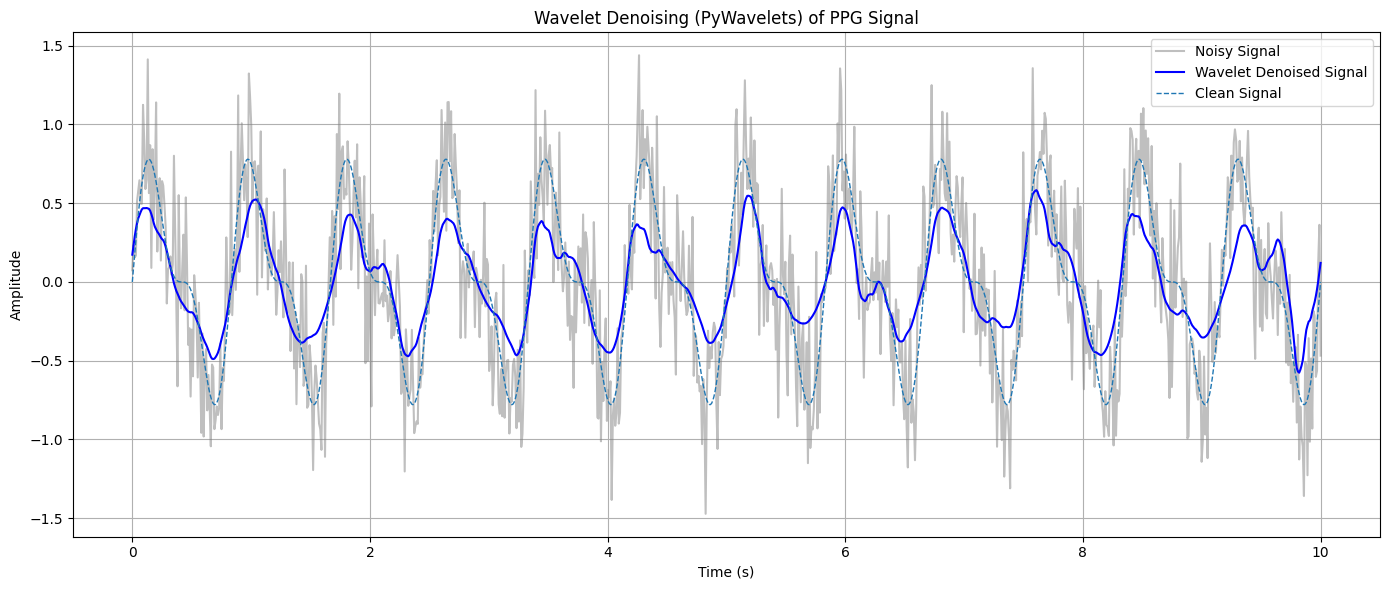


MSE Comparison (PyWavelets Denoising):
Denoised Signal vs Clean Signal: MSE = 0.058655


In [1]:
# PPG Signal Denoising using Wavelet Transform (PyWavelets)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
from sklearn.metrics import mean_squared_error

# Sampling rate and time axis
fs = 100  # Hz
t = np.linspace(0, 10, fs * 10)

# Generate clean synthetic PPG signal
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.3 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

# Denoising using Wavelet Transform
def wavelet_denoise(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, mode='per')
    # Thresholding detail coefficients
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs_thresh = [coeffs[0]] + [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs[1:]]
    return pywt.waverec(coeffs_thresh, wavelet, mode='per')

ppg_denoised = wavelet_denoise(ppg_noisy)

# Plot Denoised Signal vs Noisy and Clean
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(t, ppg_denoised, label='Wavelet Denoised Signal', color='blue')
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('Wavelet Denoising (PyWavelets) of PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: MSE Evaluation
mse_wavelet = mean_squared_error(ppg_clean, ppg_denoised)
print("\nMSE Comparison (PyWavelets Denoising):")
print(f"Denoised Signal vs Clean Signal: MSE = {mse_wavelet:.6f}")

# Notes on PyWavelets
# - `wavedec()` decomposes the signal into wavelet coefficients.
# - `threshold()` applies soft thresholding to remove noise from details.
# - `waverec()` reconstructs the cleaned signal from thresholded coefficients.
# - Wavelet used: Daubechies 4 ('db4') is common in biomedical signals.
# - You can tune the level or wavelet type for better performance.